In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# 평균을 0으로 분산을 1로 조정해서 표준화를 하기 위해 import 한다.
from sklearn.preprocessing import StandardScaler

식습관 데이터를 차원 축소시켜 시각화 하기

데이터 획득  
사람들의 하루 식습관 데이터를 만든 후 주성분 분석을 사용해 시각화 하기 위해서 칼로리, 아침, 점심, 저녁, 훈동횟수, 체형이라는 특징을 가지는 데이터프레임을 생성한다.

In [3]:
df = pd.DataFrame(columns = ['calorie', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']
df

,calorie,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


데이터 전처리  
데이터 전처리 과정을 통해 데이터 범위가 제각각인 특징을 표준화 한다.

In [4]:
# 데이터에 데이터의 특징(피쳐)와 레이블(타겟, 클래스)가 함께 있으므로 피쳐로만 구성된 데이터프레임을 만든다.
X = df[['calorie', 'breakfast', 'lunch', 'dinner', 'exercise']]
X

,calorie,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


표준화(정규화)

위의 데이터 전처리 결과를 통해 칼로리가 유난히 다른 특성들해 비해 수치 범위가 큰 것을 확인할 수 있다. 수치가 큰 칼로리와 다른 특성들은 눈으로 비교할 수 없듯이 머신러닝 모델도 비교하기 힘들어진다.  
이 경우 모든 특성들이 평균이 0이고 표준편차가 1인 데이터로 변환한 후 비교하면 특성들의 상관 관계를 이해하기 쉬워지고 머신러닝 모델 역시 더욱 효율적으로 데이터를 학습할 수 있다.

In [5]:
# 칼로리를 포함한 모든 특성들을 같은 범위내로 표준화 한다.
x_std = StandardScaler().fit_transform(X)
print(type(x_std))
print(x_std)

<class 'numpy.ndarray'>
[[-1.35205803  0.         -1.3764944  -1.28571429  1.        ]
 [ 0.01711466  0.         -0.22941573  0.14285714  0.        ]
 [ 0.61612771  1.29099445  0.91766294  0.14285714 -1.        ]
 [-1.18091145 -1.29099445 -0.22941573 -1.28571429  2.        ]
 [ 1.89972711  1.29099445  0.91766294  1.57142857 -1.        ]
 [-1.26648474 -1.29099445 -1.3764944   0.14285714  1.        ]
 [ 0.18826125  0.         -1.3764944   0.14285714  0.        ]
 [ 1.04399418  1.29099445  0.91766294  1.57142857 -1.        ]
 [-0.15403193 -1.29099445  0.91766294 -1.28571429 -1.        ]
 [ 0.18826125  0.          0.91766294  0.14285714  0.        ]]


레이블 분리하기  
각 데이터의 특성에 따른 레이블(체형)을 따로 데이터프레임으로 생성한다.

In [6]:
Y = df[['body_shape']]
Y

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


공분산 행렬 구하기  
주성분 분석을 하기 위해서 가장 먼저 할 일은 특징들의 공분산 행렬을 구하는 것이다.

In [7]:
# 넘파이의 cov() 메소드를 사용하면 공분산을 계산할 수 있다.
features = x_std.T # 전치
covariance_matrix = np.cov(features)
covariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

고유값과 고유 벡터 구하기  
공분산 행렬에서 가장 큰 고유값을 가진 고유 백터를 찾아 그 벡터위에 데이터를 사영시킨다. 사영시킨다는 의미는 데이터 손실을 최소한으로 하는 고차원 공간을 저차원으로 축소한다는 의미이다.

In [8]:
# 공분산 행렬에서 고유값과 고유 벡터를 계산한다.
las, evs = np.linalg.eig(covariance_matrix)
print('고유값\n', las, sep='')
print('고유 벡터\n', evs, sep='')

고유값
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
고유 벡터
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [9]:
# 가장 큰 고유 벡터로 데이터를 사영할 경우 얼마 만큼의 정보가 유지되는지 확인한다.
for i in range(len(las)):
    print(las[i] / sum(las))

0.7318321731427545
0.1509761705671509
0.01373316793695013
0.04996542317586186
0.05349306517728263


결과를 통해 1차원 데이터로 차원 축소를 하더라도 73% 정도에 해당되는 정보를 유지할 수 있다는 사실을 확인할 수 있다. 27% 정보의 손실은 감수하고 1차원 데이터로 축소한다.

In [10]:
projected_X = x_std.dot(evs.T[0] / np.linalg.norm(evs.T[0]))
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

시각화  
데이터가 사영된 고유 벡터(주성분)를 x축으로 하고 1차원 데이터이므로 y축은 0으로 고정시킨다.

In [11]:
result = pd.DataFrame(projected_X, columns=['PCA1'])
result['y-axis'] = 0.0
result['label'] = Y
result

,PCA1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


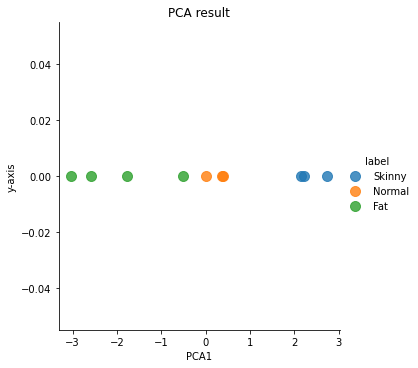

In [12]:
sns.lmplot(data=result, x='PCA1', y='y-axis', fit_reg=False, hue='label', scatter_kws={'s': 100})
plt.title('PCA result')
plt.show()

사이킷런을 이용한 주성분 분석 간단 구현  
사이킷런 라이브러리를 사용하면 단 몇 줄만으로 간단하게 주성분 분석을 구현할 수 있다. 다음과 같이 주성분 분석 라이브러리를 사용해 5차원 데이터를 1차원으로 아주 간단히 축소할 수 있다.

In [13]:
# 주성분 분석을 하기 위해 import 한다.
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=1) # n_components에 축소할 차원을 지정해서 PCA 객체를 만든다.
pca_x = pca.fit_transform(x_std) # 학습시킨다.
pca_x

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

In [15]:
sklearn_result = pd.DataFrame(pca_x, columns=['PCA1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y
sklearn_result

,PCA1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


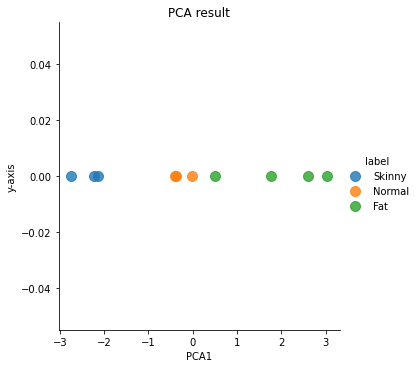

In [16]:
sns.lmplot(data=sklearn_result, x='PCA1', y='y-axis', fit_reg=False, hue='label', scatter_kws={'s': 100})
plt.title('PCA result')
plt.show()